In [1]:
import pickle5 as pickle
from matplotlib.pyplot import *
from scipy import interpolate

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/matias/anaconda3/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
def load_obj(name ):
    if name[-4:]=='.pkl':
        name = name[:-4]
    #~ try:
        #~ return pk5.dumps(name+'pkl', protocol=5)
    #~ except:
    with open( name + '.pkl', 'rb') as f:
        return pickle.load(f)
def save_obj(obj, name ):
    if name[-4:]=='.pkl':
        name = name[:-4]
    with open( name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

# Load Opsin data

Text(0, 0.5, 'Absorption normalized')

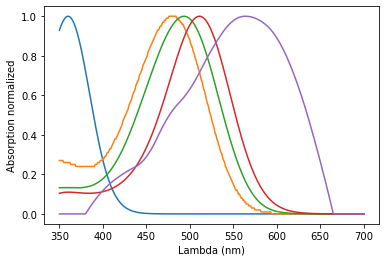

In [3]:
fsave = './PhotoReceptorData'
PhData = load_obj(fsave)

Opsins=[]
Opsins.append(PhData['Scones'])
Opsins.append(PhData['Mela'])
Opsins.append(PhData['Rods'])
Opsins.append(PhData['Mcones'])
Opsins.append(PhData['RedOpsin'])

x = PhData['x_axis']

for o in Opsins:
    plot(x,o)

xlabel('Lambda (nm)')
ylabel('Absorption normalized')

# Load light illumination Data

(489.99999999999994, 33.79310344827586)

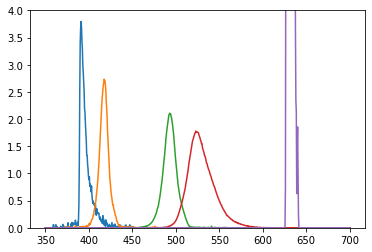

In [24]:
fsave = './IlluminationData'
IData = load_obj(fsave)

LEDs =[]
LEDs.append(IData['Violet'])
LEDs.append(IData['Blue'])
LEDs.append(IData['Green'])
LEDs.append(IData['Yellow'])
LEDs.append(IData['Red'])

x = IData['x_axis']

# Power meter correction factor from 09/09/22
correction_f = 14.5

LEDs=np.array(LEDs)/correction_f


for l in LEDs:
    plot(x,l)
    
ylim([0,4])

np.sum(IData['Violet']/2),np.sum(IData['Violet']/2)/correction_f



# Calculate Isomerization for one source for all opsins

In [11]:
#Illuminance Factor Product
"""""
Main function that gets: 
1 - the light amplitude not normalized in µW/cm²
2 - the spectra of the target opsin normalized to 1 at the peak (a.u.)
3 - the wavelength step (nm)

Factors have units of:
ac = µm²
hc = J.m
10**23 puts all in µW - µm² 

Output is in isomerizations / s

To get the result in photons/cm^2/s we have to multiply by 10^8 and divide by ac (x5 or x2 for rods)
"""""
#hyperparameters
h=6.63*10**(-34) #en J.s
c=299792458      #en m/s
ac=[0.2,0.2,0.5,0.2,0.2]           # en µm²
# ac_cones=0.2
# ac_rods=0.5
# ac_mela=0.2
# ac_reach=0.2

def IlluminanceFactor(Amp1,AmpPhoto,wl):   
    # Amplitude 1 is the LED source normalized to have the integral equal to the total power. 
    # Amp photo is the Spectral curve of the photoreceptor (all 4 together)
    # wl is the steps in lambda for the curves
    # Gives back the result of each photoreceptor
    
    IlluminanceFactor=[]
    for photo in range(len(AmpPhoto)):
        IlFa=0
        for I_wl in range(len(Amp1)):
            # Results in photoisomerisation/s /µm²
            IlFa+= Amp1[I_wl] * AmpPhoto[photo][I_wl] * wl[I_wl] * diff(wl)[10]  * ac[photo]/(h*c) *10**(-23) 
                    #µW/cm²   x   a.u.(peak at 1)    x nm (lambda) x lambda step x ph.µm² x 1/(Jm)  x convert to same units
        IlluminanceFactor.append(IlFa) 
    return np.array(IlluminanceFactor) #

def Write_fancy(result,F):
    o_names = ['Scones    ','Melanopsin','Rhodopsin ','Mcones    ','Red_opsin ']
    for i,r in enumerate(result):
        if F=='scientific':
            print(o_names[i],' :',"{:.2e}".format(r))
        else:
             print(o_names[i],' :',"{:10.0f}".format(r))
    

In [12]:
# Get effect from Violet

ISO_result = IlluminanceFactor(LEDs[0],Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :      48428
Melanopsin  :      36136
Rhodopsin   :      56770
Mcones      :      14872
Red_opsin   :      12944

Scones      : 4.84e+04
Melanopsin  : 3.61e+04
Rhodopsin   : 5.68e+04
Mcones      : 1.49e+04
Red_opsin   : 1.29e+04


In [13]:
# Get effect from Blue

ISO_result = IlluminanceFactor(LEDs[1],Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :      11461
Melanopsin  :      58859
Rhodopsin   :     102194
Mcones      :      21246
Red_opsin   :      26380

Scones      : 1.15e+04
Melanopsin  : 5.89e+04
Rhodopsin   : 1.02e+05
Mcones      : 2.12e+04
Red_opsin   : 2.64e+04


In [14]:
# Get effect from Green

ISO_result = IlluminanceFactor(LEDs[2],Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          6
Melanopsin  :     176185
Rhodopsin   :     466769
Mcones      :     166847
Red_opsin   :     113273

Scones      : 5.96e+00
Melanopsin  : 1.76e+05
Rhodopsin   : 4.67e+05
Mcones      : 1.67e+05
Red_opsin   : 1.13e+05


In [15]:
# Get effect from Yellow

ISO_result = IlluminanceFactor(LEDs[3],Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          0
Melanopsin  :     132055
Rhodopsin   :     492312
Mcones      :     254249
Red_opsin   :     264265

Scones      : 3.37e-01
Melanopsin  : 1.32e+05
Rhodopsin   : 4.92e+05
Mcones      : 2.54e+05
Red_opsin   : 2.64e+05


In [44]:
# Get effect from RED

ISO_result = IlluminanceFactor(LEDs[4],Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :          0
Melanopsin  :          0
Rhodopsin   :      65612
Mcones      :     133880
Red_opsin   :   17587519

Scones      : 9.21e-04
Melanopsin  : 0.00e+00
Rhodopsin   : 6.56e+04
Mcones      : 1.34e+05
Red_opsin   : 1.76e+07


In [16]:
# Get effect from All together

ISO_result = IlluminanceFactor(np.sum(LEDs[0:4],axis=0),Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :      59895
Melanopsin  :     403236
Rhodopsin   :    1118046
Mcones      :     457213
Red_opsin   :     416862

Scones      : 5.99e+04
Melanopsin  : 4.03e+05
Rhodopsin   : 1.12e+06
Mcones      : 4.57e+05
Red_opsin   : 4.17e+05


25.0

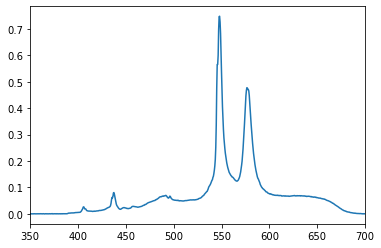

In [19]:
# Load LED data (for white in this case)
file_cal = '/home/matias/Dropbox/Drop-IdV/PROJECTS/COLORS/EXPS_AND_CALIBRATIONS/CALIBRATION_5colors/cal_with_MEA'
caldata =load_obj(file_cal)

lx = caldata['xnm']
lx[0] = 300

color_order = caldata['orderS']
spec_curves = np.array(caldata['LedSpectra'])
spec_curves[:,0]=0
#--------------------------------------------------------------------------------
# White Spec for OPTOGEN
WC = caldata['whiteC']
WP= caldata['whiteP']

# figure()
# plot(lx,spec_curves[:-2].T)
# xlim([350,700])

#--------------------------------------------------------------------------------
# White Spec for Vis Stim
figure()
WhiteVisPower = 25

WhiteVS = spec_curves[5]/np.sum(spec_curves[5])/diff(lx)[10]  * WhiteVisPower

f = interpolate.interp1d(lx,WhiteVS)
newWvis = f(x)/np.sum(f(x))*np.sum(WhiteVS)*diff(lx)[10]/diff(x)[0]

plot(x,newWvis)
xlim([350,700])

np.sum(newWvis)*diff(x)[10]

In [20]:
# Get effect from White at Vis stim in 2p Setup

ISO_result = IlluminanceFactor(newWvis,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :        264
Melanopsin  :      26443
Rhodopsin   :      93226
Mcones      :      48966
Red_opsin   :     111862

Scones      : 2.64e+02
Melanopsin  : 2.64e+04
Rhodopsin   : 9.32e+04
Mcones      : 4.90e+04
Red_opsin   : 1.12e+05


In [30]:
# Get effect from White at OPTO full field

WhiteOptoPower = 71900/correction_f
ISO_result = IlluminanceFactor(newWvis/np.sum(newWvis)*WhiteOptoPower/diff(x)[10],Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')

print('')
# For Chrimson activation -> photons / cm2 / s -> *10^8 /ac  (=*5)
print('For photons / cm / s')
Write_fancy(ISO_result*10**8*5,F='scientific')

Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :      52290
Melanopsin  :    5244902
Rhodopsin   :   18490972
Mcones      :    9712232
Red_opsin   :   22187274

Scones      : 5.23e+04
Melanopsin  : 5.24e+06
Rhodopsin   : 1.85e+07
Mcones      : 9.71e+06
Red_opsin   : 2.22e+07

For photons / cm / s
Scones      : 2.61e+13
Melanopsin  : 2.62e+15
Rhodopsin   : 9.25e+15
Mcones      : 4.86e+15
Red_opsin   : 1.11e+16


# Get Here my own result

(0.0, 9.956789233282185)

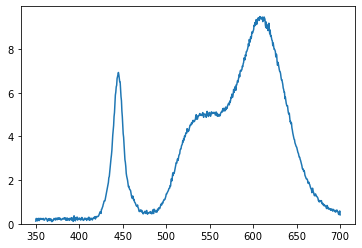

In [42]:
def ExtractSpectData(f,skiplines=16):
    data=[]
    with open(f ,'r') as file:
        count=0
        data = []
        for readline in file: 
            count+=1
            if count>skiplines:
                line_strip = readline.strip()
                data.append(line_strip.split('\t'))
    data=np.array(data).astype('float')
    return np.array(data)

#-------------------------------------------------------------------------------------
# Load your light source normalized to have the area beneath the curve equal to the total power
# (take into account that our x coordinate has a step of 0.5)
##############################
rootf = '/home'
myfile = rootf + '/matias/Dropbox/Drop-IdV/PROJECTS/COLORS/EXPS_AND_CALIBRATIONS/MEA2_calibration/spectra_white_USB2H153121_17-13-59-331.txt'
white = ExtractSpectData(myfile)

bfile = './background'
bckgnd = load_obj(bfile)
##############################

#----------------------------------------
# Substracting background
White=white
White[:,1]=white[:,1]-bckgnd[:]

#Putting at 0 the curve

White[:,1]=White[:,1]-np.min(White[1000:,1])
# print(np.mean(White[:,1]))

# Get proper x axis

xnew = np.linspace(350,700,701)
lx = White[:,0]

f = interpolate.interp1d(lx,White[:,1])
newWhite = f(xnew)/np.sum(f(xnew))*np.sum(White[:,1])*diff(lx)[10]/diff(xnew)[0]   # use interpolation function returned by `interp1d`

##############################
# Measured Power (uW/cm^2)
correct_factor_mea2 = 55.7
P=61400/correct_factor_mea2
##############################
newWhite = newWhite/np.sum(newWhite)*P/diff(x)[0]   #remember to divide by binsize

#----------------------------------------
# plot light specturm
plot(x,newWhite)
ylim(bottom=0)
# -----------------------------------------

In [43]:

# my_light = load_obj(myfile)
my_light = newWhite

ISO_result = IlluminanceFactor(my_light,Opsins,x)

print('Results are in: Isomerisations/s - For R* value look for Rhodopsin result\n')
Write_fancy(ISO_result,F=0)
print('')
Write_fancy(ISO_result,F='scientific')


Results are in: Isomerisations/s - For R* value look for Rhodopsin result

Scones      :      35729
Melanopsin  :    1017826
Rhodopsin   :    3162353
Mcones      :    1494050
Red_opsin   :    4395772

Scones      : 3.57e+04
Melanopsin  : 1.02e+06
Rhodopsin   : 3.16e+06
Mcones      : 1.49e+06
Red_opsin   : 4.40e+06


(2048, 2)